# Corona Virus
### **Introduction**
In this notebook we present a general look at our dataset at hands and the diferent outcomes we can extract from the data.\
In the next section we will explore our data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Loading Data**

In [2]:
df_mortes=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_confirmados=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_recuperados=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

### **Data Preview**

In [3]:
df_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,853,853,853,854,854,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,138,140,142,148,155,166,172,176,183,186


In [4]:
df_recuperados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,781,781,789,789,791,792,792,792,792,796
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,61,61,64,64,64,64,66,66,77,77


In [5]:
df_mortes=df_mortes.drop(columns=['Country/Region','Lat','Long'])

### **Data Exploration**

In this next section, a conjuction of graphs were made to understand the progression of the virus worldwide.\
We have three datasets at hand, each contains the Total, recovered and deaths caused in each country due to the virus pandemic.

In [7]:
mortes_total=df_mortes.sum()
mortes_total.head()

1/22/20    17
1/23/20    18
1/24/20    26
1/25/20    42
1/26/20    56
dtype: int64

In [8]:
df_confirmados=df_confirmados.drop(columns=['Country/Region','Lat','Long'])
df_recuperados=df_recuperados.drop(columns=['Country/Region','Lat','Long'])

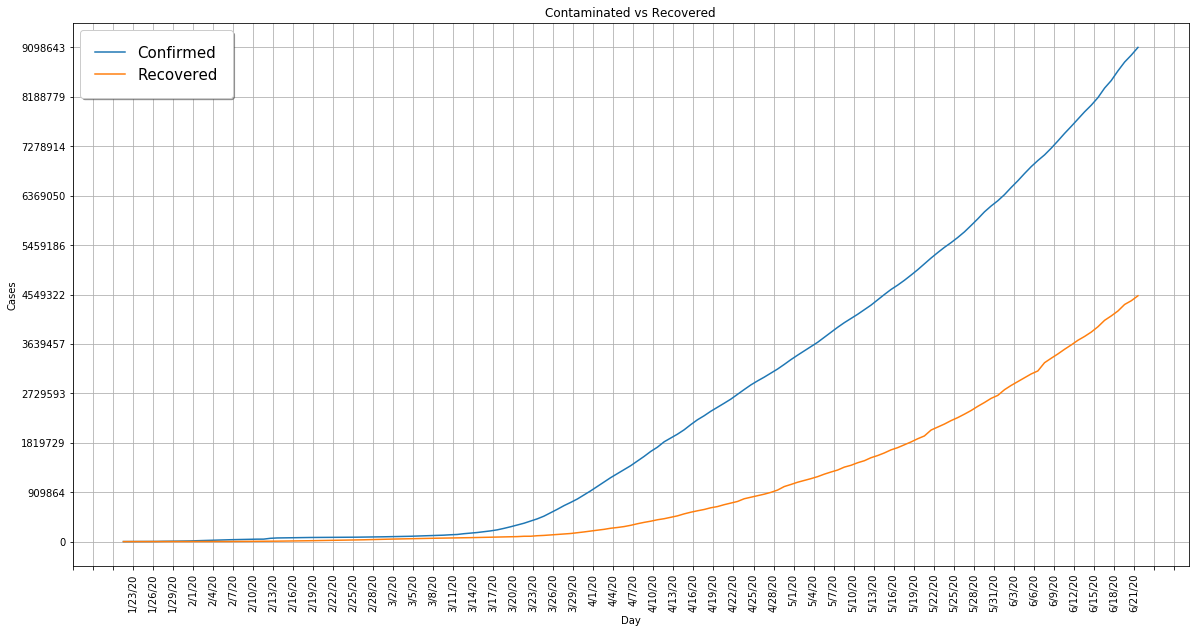

In [9]:
confirmados_total=df_confirmados.sum()
recuperados_total=df_recuperados.sum()


fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(confirmados_total,label='Confirmed')
ax.plot(recuperados_total,label='Recovered')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize='15')
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, max(confirmados_total)+1, max(confirmados_total)/10))
ax.set(xlabel='Day',
       ylabel='Cases',
       title='Contaminated vs Recovered')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3))
ax.grid()

plt.show()

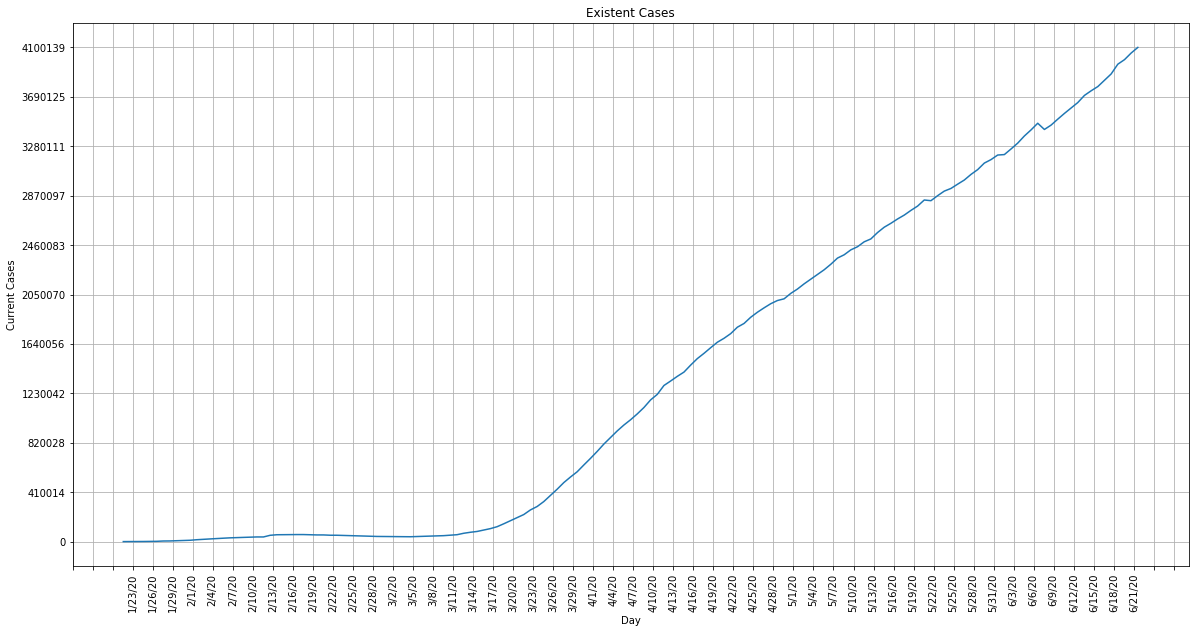

In [10]:
CasosAtuais=confirmados_total-recuperados_total-mortes_total
CasosAtuais
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(CasosAtuais)
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, max(CasosAtuais)+1, max(CasosAtuais)/10))
ax.set(xlabel='Day', ylabel='Current Cases',
       title='Existent Cases')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3))
ax.grid()

plt.show()

In [13]:
class pais():
    def __init__(self,_country):
       self.country = _country
       self.PrepareData()
    def PrepareData(self):
        df_mortes2=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
        df_confirmados2=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
        df_recuperados2=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

        
        confirmados_pais = df_confirmados2.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum()
        mortes_pais = df_mortes2.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum()
        recuperados_pais = df_recuperados2.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum()


        df_pais_totais=confirmados_pais.loc[[self.country]]
        df_pais_ativos=confirmados_pais.loc[[self.country]]-recuperados_pais.loc[[self.country]]-mortes_pais.loc[[self.country]]
        df_pais_recuperados=recuperados_pais.loc[[self.country]]
        df_pais_mortes=mortes_pais.loc[[self.country]]
       

        df_pais_ativos.head()
        self.pais_ativos=df_pais_ativos.sum()

        self.pais_recuperados=df_pais_recuperados.sum()

        self.pais_mortes=df_pais_mortes.sum()

        self.pais_total=df_pais_totais.sum()
    def Graficos(self):

        fig, ax = plt.subplots(figsize=(20, 10))
        fig.suptitle('Daily Corona Cases '+self.country, fontsize=25, fontweight='bold', color='#0c3c6e')
        plt.xlabel('Day', fontsize=20)
        plt.ylabel('Current cases', fontsize=20)
        ax.plot(self.pais_ativos,label="Active")
        ax.plot(self.pais_recuperados,label="Recovered")
        ax.plot(self.pais_mortes,label="Deaths")
        ax.plot(self.pais_total,label="Total")
        ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize='15')
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end, 3))
        plt.xticks(rotation='vertical')
        ax.grid()
        #fig.savefig('static/Activos.png')
        plt.show()
        
        
        self.total = self.pais_total
        self.pais_total=self.pais_total.to_frame()
        lista_values=[]
        lista_index=[]
        
        for index, row in self.pais_total.iterrows():
            if row.sum()>0:
                lista_values.append(int(row-sum(lista_values)))
                lista_index.append(index)
            
        fig, ax = plt.subplots(figsize=(20, 10))
        fig.suptitle('Daily Corona Cases '+self.country, fontsize=15, color='#0c3c6e')

        plt.xlabel('Day', fontsize=10)
        plt.ylabel('Cases per day', fontsize=10)
        

        df_values=pd.DataFrame(index=lista_index)
        
        df_values['CasosDiarios']=lista_values
        #print(df_values)
        #df_values.index=self.pais_total.index
        ax.bar(df_values.index,df_values[:]['CasosDiarios'])
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end, 3))
        plt.xticks(rotation='vertical')
        ax.grid()
        #fig.savefig('static/Casos_diarios.png')
        plt.show()

### **Country Analysis**
In the next code block, by changing the "nome" variable we can access a personalized graph for each country.\

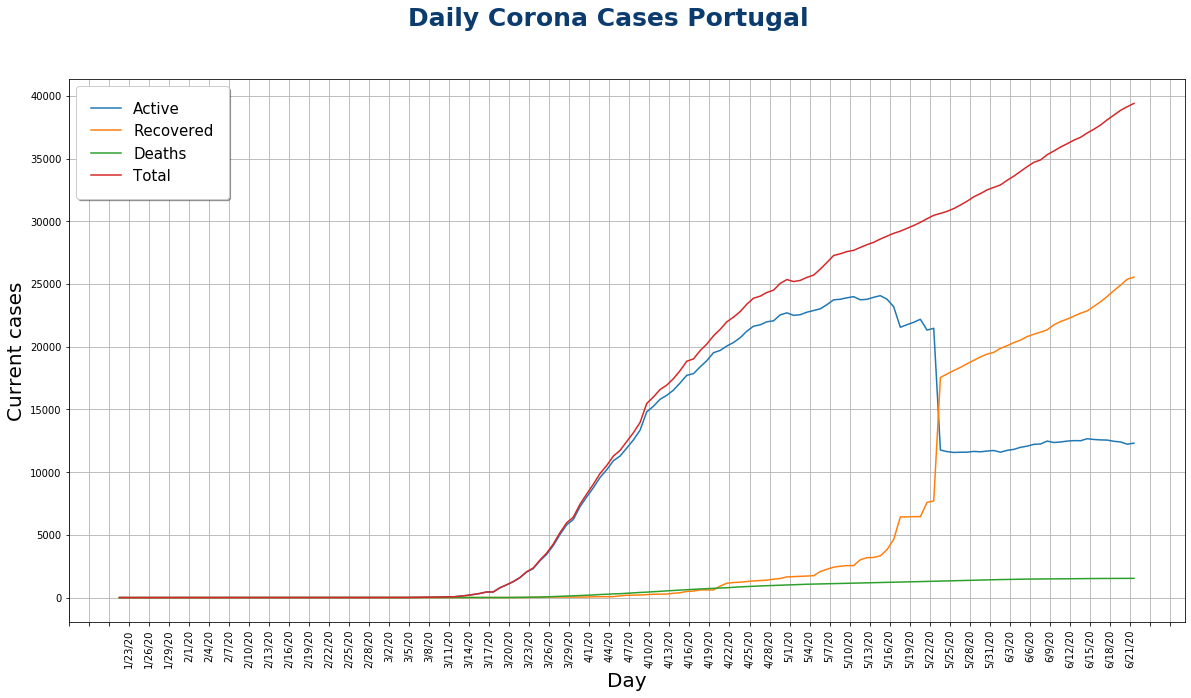

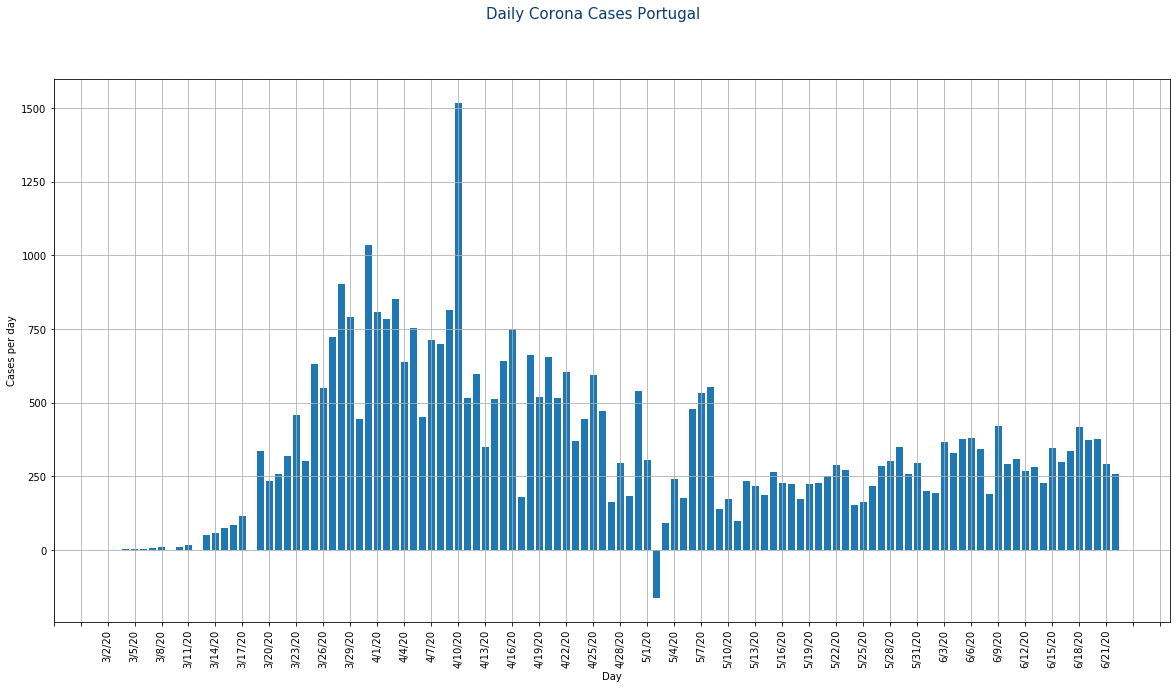

In [14]:
nome="Portugal"
data = pais(nome)
data.Graficos()


### **Data Understanding conclusion**
In this notebook, the data exploration is concluded, in the next notebook, the data will be shaped so we can train a LSTM model capable of predicting data for each country.\
Predictions of all three indicators, cases, recoveries and deaths.\
